# Preprocess the Images

In [1]:
# Required library for image data augmentation:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Creation of Instance of the ImageDataGenerator class for train and test:
train_imagen = ImageDataGenerator(rescale = 1.0/255, 
                                  shear_range = 0.2,
#                                   rotation_range = 10, fill_mode='nearest',
#                                   width_shift_range=0.2, height_shift_range=0.2,
                                  horizontal_flip= True, vertical_flip=False,
                                  brightness_range=[0.8,1.2],
                                  zoom_range= 0.2)
# train_imagen = ImageDataGenerator(rescale = 1.0/255, shear_range = 0.1, zoom_range= 0.2,horizontal_flip= True)
test_imagen = ImageDataGenerator(rescale = 1.0/255)

In [3]:
# Import Data
train_path = r"C:\Users\ASUS\Documents\python\IBM_Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\train"  
test_path = r"C:\Users\ASUS\Documents\python\IBM_Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\test"

x_train = train_imagen.flow_from_directory(train_path, target_size= (128,128), class_mode= "categorical", batch_size= 32)  
x_test = test_imagen.flow_from_directory(test_path, target_size= (128,128), class_mode= "categorical", batch_size= 32)
print("Categories with lebel = ", x_train.class_indices)
print("Length of Train Data = ", len(x_train), "," "Length of Test Data = ", len(x_test))

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.
Categories with lebel =  {'Apple___Black_rot': 0, 'Apple___healthy': 1, 'Corn_(maize)___Northern_Leaf_Blight': 2, 'Corn_(maize)___healthy': 3, 'Peach___Bacterial_spot': 4, 'Peach___healthy': 5}
Length of Train Data =  169 ,Length of Test Data =  53


# Model Building for Fruit Disease Prediction

In [4]:
# Import Libraries for Model Training:
# Import the libraries that are required to initialize the neural network layer, 
# and create and add different layers to the neural network model.
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten
from keras.layers import Dense

In [5]:
# Model Construction:
model = Sequential()

model.add(Convolution2D(16, (3,3), input_shape = (128,128,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Convolution2D(32, (3,3), input_shape = (128,128,3), activation='relu'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Convolution2D(64, (3,3), input_shape = (128,128,3), activation='relu'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Flatten())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [6]:
# Add Dense Layers in Model:
model.add(Dense(units=40,  kernel_initializer = "uniform", activation= "relu"))           # 1st Hidden Layer
model.add(Dense(units=20, kernel_initializer = "random_uniform", activation= "relu"))     # 2nd Hidden Layer
model.add(Dense(units=6, kernel_initializer = "random_uniform", activation= "softmax"))   # Output Layer

In [7]:
# Creating Checkpoint:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = r"C:\Users\ASUS\Documents\python\IBM_Project\checkpoints"

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)

In [8]:
# Model Compilation & Training:
model.compile(optimizer= "adam", loss= "categorical_crossentropy", metrics= ['accuracy'])

history = model.fit(x_train, steps_per_epoch= len(x_train)-1, 
                    validation_data= x_test, validation_steps= len(x_test)-1, 
                    callbacks=[model_checkpoint_callback], epochs = 30);

Epoch 1/30
168/168 [==============================] - ETA: 0s - loss: 1.3521 - accuracy: 0.4695
Epoch 1: val_loss improved from inf to 0.83816, saving model to C:\Users\ASUS\Documents\python\IBM_Project\checkpoints
168/168 [==============================] - 36s 210ms/step - loss: 1.3521 - accuracy: 0.4695 - val_loss: 0.8382 - val_accuracy: 0.6881
Epoch 2/30
168/168 [==============================] - ETA: 0s - loss: 0.5640 - accuracy: 0.7973
Epoch 2: val_loss improved from 0.83816 to 0.32628, saving model to C:\Users\ASUS\Documents\python\IBM_Project\checkpoints
168/168 [==============================] - 34s 205ms/step - loss: 0.5640 - accuracy: 0.7973 - val_loss: 0.3263 - val_accuracy: 0.9062
Epoch 3/30
168/168 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8782
Epoch 3: val_loss improved from 0.32628 to 0.30763, saving model to C:\Users\ASUS\Documents\python\IBM_Project\checkpoints
168/168 [==============================] - 34s 200ms/step - loss: 0.3537 - accu

Epoch 27/30
168/168 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9738
Epoch 27: val_loss did not improve from 0.06067
168/168 [==============================] - 36s 214ms/step - loss: 0.0751 - accuracy: 0.9738 - val_loss: 0.1268 - val_accuracy: 0.9639
Epoch 28/30
168/168 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9817
Epoch 28: val_loss did not improve from 0.06067
168/168 [==============================] - 35s 211ms/step - loss: 0.0482 - accuracy: 0.9817 - val_loss: 0.0730 - val_accuracy: 0.9760
Epoch 29/30
168/168 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9804
Epoch 29: val_loss did not improve from 0.06067
168/168 [==============================] - 36s 212ms/step - loss: 0.0577 - accuracy: 0.9804 - val_loss: 0.0832 - val_accuracy: 0.9730
Epoch 30/30
168/168 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9776
Epoch 30: val_loss did not improve from 0.06067
168/168 [=========

In [10]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

In [11]:
# Saving Model
model.save("fruit.h5")

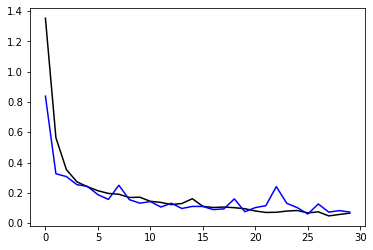

In [9]:
# Visualization of Training and Validation Losses
import matplotlib.pyplot as plt
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["val_accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(range(30), train_loss, 'k', range(30), val_loss, 'b')
#plt.plot(range(30), train_acc, range(30), val_acc)

# Testing of Model:

In [12]:
# Import Libraries for Model Testing:
from keras.models import load_model
from keras.preprocessing.image import image_utils
import numpy as np

In [13]:
# Load Model:
model = load_model("fruit.h5")

In [14]:
# Test Image Path:
testimg_folder_basic = r"C:\Users\ASUS\Documents\python\IBM_Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\test"

testimg_folder_sub = "\Corn_(maize)___Northern_Leaf_Blight"     
testimg = "\\8c674c27-dcc1-4ce3-a3e7-669f9dd3521b___RS_NLB 3867.jpg"

testimg_path = testimg_folder_basic + testimg_folder_sub  + testimg

# Categories:
categories =  ['Apple: Black Rots', 'Apple: Healthy', 
               'Corn: Northern Leaf Blight','Corn: Healthy', 
               'Peach: Bacterial Spots', 'Peach: Healthy']

In [15]:
# Load Test Image:
test_img = image_utils.load_img(testimg_path ,target_size = (128,128))

# Convert image to array:
test_img = image_utils.img_to_array(test_img)

# Expand Dimention 
test_img = np.expand_dims(test_img, axis = 0)


In [16]:
# Final Prediction:
prediction = model.predict(test_img)

print("")
print("Image category = ", categories[np.argmax(prediction)])

1/1 [==============================] - 0s 77ms/step

Image category =  Corn: Northern Leaf Blight
